## Data Generator

In [1]:
import sys
print(sys.version)

2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
# Add relative path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
from utils.parse_txt_to_inputs import parse_txt_to_inputs    # Data handler for LISA dataset

x_train, y_train = parse_txt_to_inputs('../training_extension.txt')
labels           = np.unique(y_train[:,1])
num_classes      = len(labels)  # Count number of classes in the dataset

print("Train: {} samples\nNumber of classes: {}".format(len(x_train),num_classes))

Number of ground truth boxes: 11527 boxes
Train: 11527 samples
Number of classes: 56


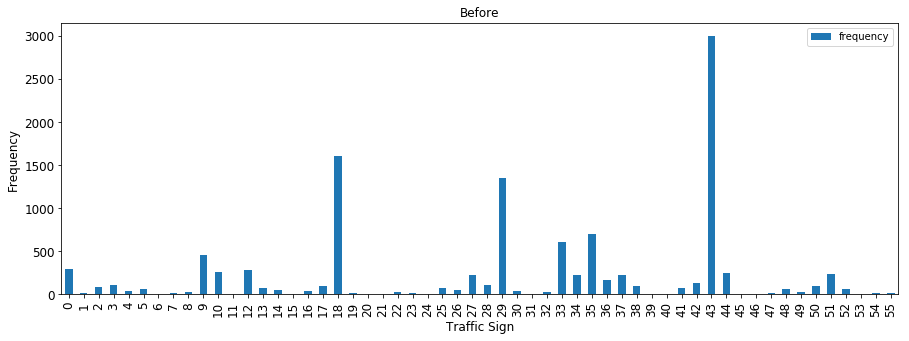

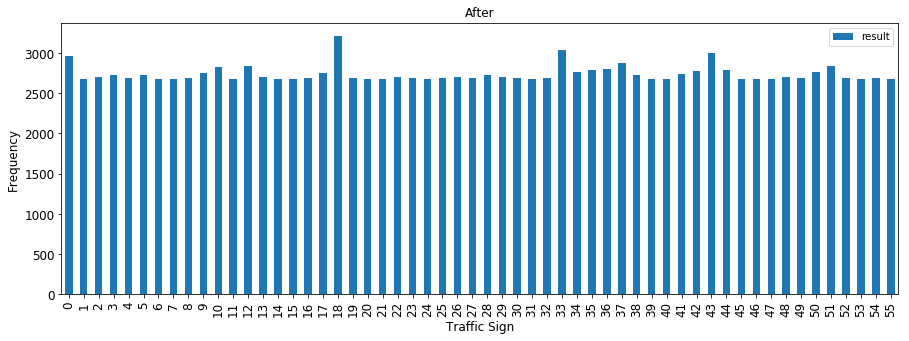

In [9]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from utils.data_generator import calc_augment_level

df = calc_augment_level(y_train, scaling_factor=13)  # (less data / class means more augmentation)
ax = df[['label','frequency']].plot(kind='bar', title='Before', figsize=(15, 5), legend=True, fontsize=12)
ax.set_xlabel("Traffic Sign", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

df['result'] = df.frequency*df.scaling_factor
plt.figure()
ax = df[['label','result']].plot(kind='bar', title='After', figsize=(15, 5), legend=True, fontsize=12)
ax.set_xlabel("Traffic Sign", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

In [12]:
import pandas as pd
from cfg import *
    # Get list of classes
fl = open(CATEGORIES, 'r')
CLASSES = np.array(fl.read().splitlines())
fl.close()

categories = np.unique(y_train[:, 1])
label_map  = pd.factorize(categories)[0]

In [13]:
from utils.data_generator import flow_from_list
from cfg import *

data_gen   = flow_from_list(x_train, y_train, batch_size=8, scaling_factor=5, augment_data=True)

In [14]:
images, labels  = data_gen.next()

print("Images shape {}".format(images[0].shape))
GRID_W = np.shape(images)[2]/ SHRINK_FACTOR
GRID_H = np.shape(images)[1]/ SHRINK_FACTOR

labels = labels.reshape([-1, GRID_H, GRID_W, N_ANCHORS, N_CLASSES+5])
print("List of images : {}".format(np.shape(images)))
print("List of labels : {}\n".format(np.shape(labels)))

Images shape (608, 608, 3)
List of images : (8, 608, 608, 3)
List of labels : (8, 19, 19, 5, 66)



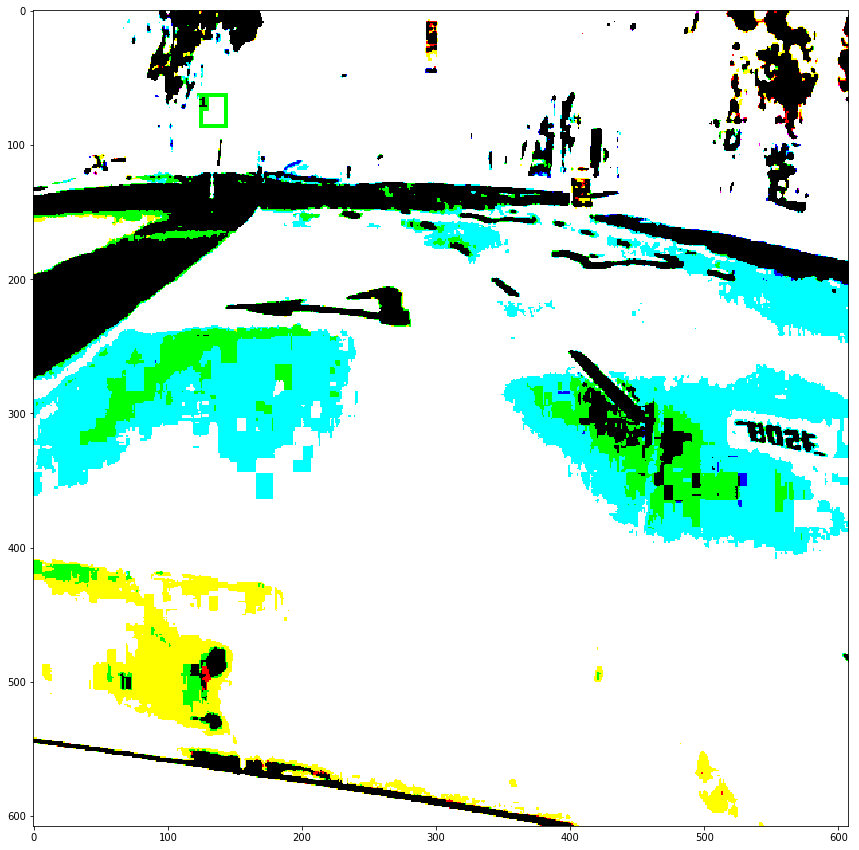

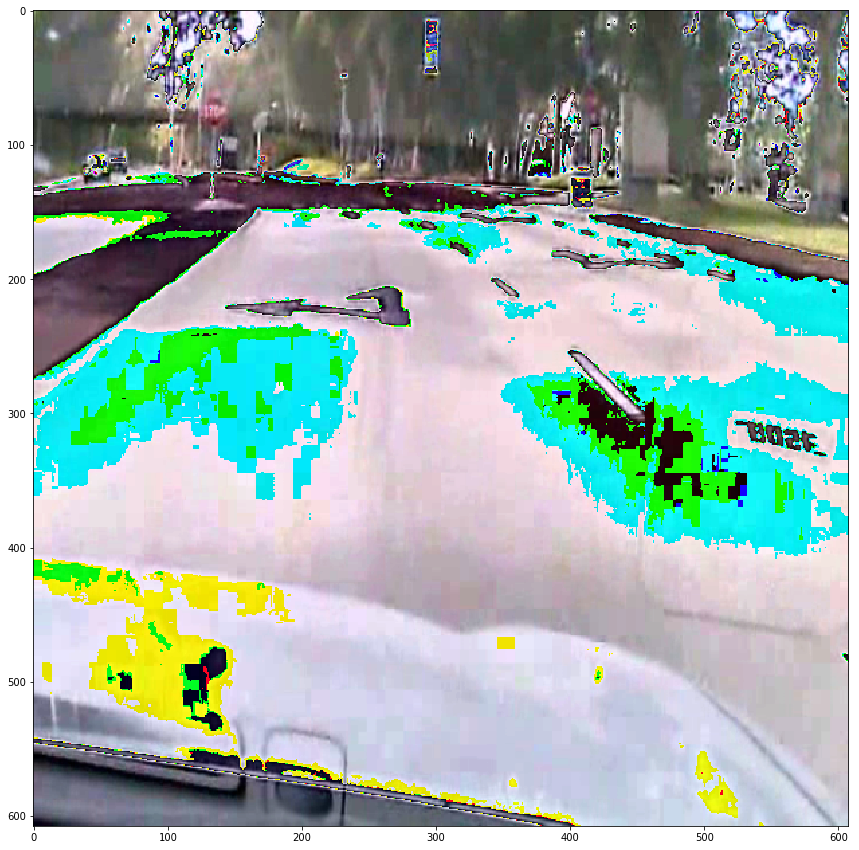

In [18]:
from utils.draw_boxes import draw, Box
import matplotlib.pyplot as plt
%matplotlib inline

def xywh_to_xyxy(xc, yc, w, h):
    x1 = xc - w * 0.5
    y1 = yc - h * 0.5
    x2 = xc + w * 0.5
    y2 = yc + h * 0.5
    return x1, y1, x2, y2

i = np.random.randint(0, 4)
height, width, _ = images[i].shape
tmp = labels[i][labels[i] > 0.]
if len(tmp[0:4]) == 0 :
    bbox = Box(0,0,0,0)
else:
    xc, yc, w ,h   = tmp[tmp > 0][0:4]
    bbox = np.array(xywh_to_xyxy(xc, yc, w, h))
    x1, y1, x2, y2 = bbox * np.array([608, 608, 608, 608])
    bbox = [Box(x1, y1, x2, y2, 1, 0.0)]

plt.figure(figsize=(15, 15))
plt.imshow(draw(images[i], bbox))
plt.figure(figsize=(15, 15))
plt.imshow(images[i])

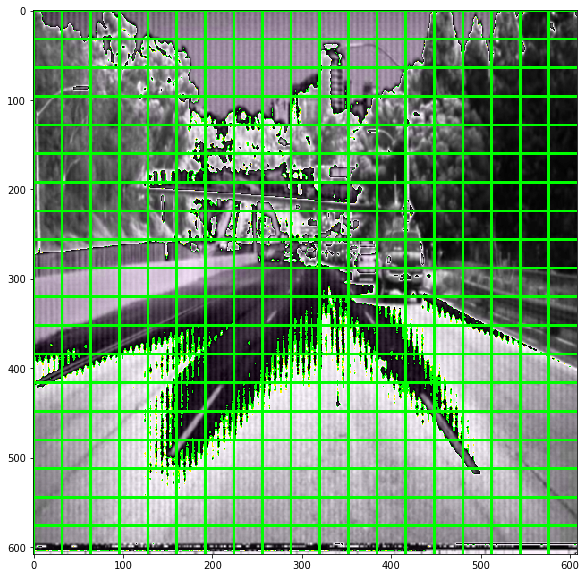

In [19]:
import cv2
img = images[0]
height, width, c = img.shape

shrink_factor = 32
grid_w = list(range(width/shrink_factor))
grid_h = list(range(height/shrink_factor))
center = 0
# Plot grid map
for r in grid_w:
    img = cv2.line(img,(r*shrink_factor, 0), (r*shrink_factor, height), color=(0, 1, 0), thickness=2)
    
for h in grid_h:
    img = cv2.line(img,(0, h*shrink_factor), (width, h*shrink_factor), color=(0, 1, 0), thickness=2)
    
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [ ]:
from utils.augment_img import draw_boxes
from utils.box import Box
import matplotlib.pyplot as plt
%matplotlib inline

label_map = np.unique(y_train[:, 1])
row, col = 2, 2
fg, a    = plt.subplots(row, col, figsize =(20, 15))
fg.tight_layout()
height, width, _ = images[0].shape
print("Image size:", images[0].shape)
i        = 0
for r in range(row):
    for c in range(col):
        tmp = labels[i][labels[i] > 0.]
        if len(tmp[0:4]) == 0 :
            bbox = Box(0,0,0,0)
        else:
            xc, yc, w ,h = tmp[tmp > 0][0:4]
            bbox = Box(xc, yc, w ,h)
            print(bbox)
        bbox.to_abs_size((width, height))
        opencv_box = bbox.to_opencv_format()
        print(opencv_box)
        a[r, c].axis('off')
        a[r, c].imshow(draw_boxes(images[i], opencv_box, color=(255, 255, 255), thickness=2))
        a[r, c].set_title(str(i))
        i +=1